In [1]:
from css_utility import *
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from scipy.stats import norm
import itertools
import pandas as pd
import seaborn as sns
%matplotlib inline
import pickle

In [2]:
gene_css_all=pickle.load(open("../database/temp_files/css_gene_unit_lst_all","rb"))

In [3]:
tot_gene_css=flatLst(gene_css_all)

In [4]:
len(tot_gene_css)

43428

In [123]:
# check the no. of CSS or no. of times of switching of CSS per gene, for a single chromosome
def complexity_overview(chr_gene_css):
    abs_uniq_all=[]
    abs_switch_all=[]
    compl_uniq_all=[]
    compl_swit_all=[]
    
    for num in range(len(chr_gene_css)):
        gene_css=chr_gene_css[num]
        gene_css_len=len(gene_css)
        css_uniq=len(set(gene_css)) # only the unique css (min=1, max=gene_css_len)
        
        tot_char=""
        for i, char in enumerate(gene_css):
            if i==0 or char!=gene_css[i-1]:
                tot_char+=char
            css_switch=len(tot_char) # num. of swtiching in css (min=1, max=gene_css_len)
            complexity_uniq=css_uniq/gene_css_len
            complexity_swit=css_switch/gene_css_len
            
        abs_uniq_all.append(css_uniq)  # asolute no. of uniq css
        abs_switch_all.append(css_switch) # abs. no. of time switching
        compl_uniq_all.append(complexity_uniq) # proportion (uniq css/ gene length)
        compl_swit_all.append(complexity_swit) # proportion (switching css/ gene length)
    
    return abs_uniq_all,abs_switch_all,compl_uniq_all,compl_swit_all
        

In [5]:
def complexity_overview_mat(chr_gene_css):
    abs_uniq_all=[]
    abs_switch_all=[]
    gene_len_all=[]
    compl_uniq_all=[]
    compl_swit_all=[]
    for num in range(len(chr_gene_css)):
        gene_css=chr_gene_css[num]
        gene_css_len=len(gene_css)
        css_uniq=len(set(gene_css)) # only the unique css (min=1, max=gene_css_len)
        
        tot_char=""
        for i, char in enumerate(gene_css):
            if i==0 or char!=gene_css[i-1]:
                tot_char+=char
            css_switch=len(tot_char) # num. of swtiching in css (min=1, max=gene_css_len)
            complexity_uniq=css_uniq/gene_css_len
            complexity_swit=css_switch/gene_css_len
        
        gene_len_all.append(gene_css_len)
        abs_uniq_all.append(css_uniq)
        abs_switch_all.append(css_switch)
        compl_uniq_all.append(complexity_uniq)
        compl_swit_all.append(complexity_swit)
        
    data=list(zip(gene_len_all,abs_uniq_all, abs_switch_all,compl_uniq_all,compl_swit_all))
    df=pd.DataFrame(data,columns=["length","uniq","switch","uniq_pro","switch_pro"])
    df=df[df["length"]>=2]  # remove when the length = 1 unit (=200 bps)
    
    return df

In [6]:
df=complexity_overview_mat(tot_gene_css)

In [68]:
df.head()

,length,uniq,switch,uniq_pro,switch_pro
0,67,1,1,0.014925,0.014925
2,157,5,8,0.031847,0.050955
3,157,5,8,0.031847,0.050955
4,157,5,8,0.031847,0.050955
5,157,5,8,0.031847,0.050955


In [ ]:
fig,ax=plt.subplots(figsize=(6,4))
sns.histplot(df_tot_less["length"], ax=ax, log_scale=True, color="yellowgreen", element="step", fill=False, bins=14, legend="less complex" )
sns.histplot(df_tot_comp["length"], ax=ax, log_scale=True, color="royalblue", element="step", fill=False, bins=14, legend="complex" )
ax.set_ylabel("Counts")
ax.set_xlabel("Gene length")
ax.set_title("All chromosomes")
ax.legend(["less complex","complex"])
plt.show()

In [121]:
def div_df_by_swtpro(df, thres="mean"):
    df_lt2=df[df["length"]>2]
    assert min(df_lt2["length"])==3, "mininum length should be 3"
    
    tot_lst=df_lt2["switch_pro"].tolist()
    if thres=="mean":
        thres_val=np.mean(df["switch_pro"])
        df_comp=df_lt2[df_lt2["switch_pro"]>thres_val]
        comp_swt_lst=df_comp["switch_pro"].tolist()
        
        df_less=df_lt2[df_lt2["switch_pro"]<=thres_val]
        less_swt_lst=df_less["switch_pro"].tolist()
        fig,ax=plt.subplots(figsize=(6,4))
        sns.histplot(tot_lst, bins=20, log_scale=True, color="darkblue", element="step", fill=False, ax=ax)
        plt.axvline(thres_val, 0,7000, linestyle="--", color="gray")
#         sns.histplot(comp_swt_lst, bins=20, log_scale=True, color="royalblue", element="step", fill=False, ax=ax)
#         sns.histplot(less_swt_lst, bins=20, log_scale=True, color="yellowgreen", element="step", fill=False, ax=ax)
    
    return df_comp,df_less

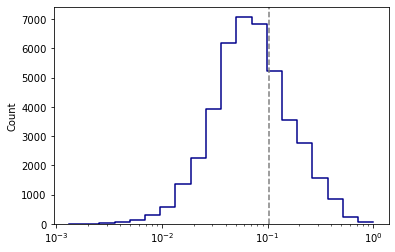

In [122]:
df_comp,df_less=div_df_by_swtpro(df, thres="mean")

In [84]:
df_lt2=div_df_by_swtpro(df)
min(df_lt2["length"])

3

In [80]:
tot_swtpro=df["switch_pro"].tolist()

In [81]:
tot_swtpro[:5]

[0.014925373134328358,
 0.050955414012738856,
 0.050955414012738856,
 0.050955414012738856,
 0.050955414012738856]

<AxesSubplot:xlabel='switch_pro', ylabel='Count'>

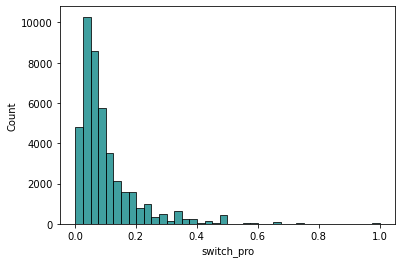

In [77]:
sns.histplot(df["switch_pro"], bins=40, color='teal')

1.0

In [8]:
len(df)

43217

In [9]:
comp_gene_css_all,less_comp_gene_css_all=extract_complex_css(gene_css_all, thres="mean")

In [11]:
len(comp_gene_css_all)

13484

In [67]:
len(less_comp_gene_css_all)

29733

In [43]:
complex_cases=comp_gene_css_all[102:120]

In [59]:
less_complex_cases=less_comp_gentotal e_css_all[2000:2010]

In [49]:
colored_css_str_as_is(complex_cases[6])

JJJJJJJJMMNNNNNNNNNNNNN


In [50]:
len(less_comp_gene_css_all[96])

114

In [66]:
colored_css_str_as_is(less_complex_cases[4])

EEGGGFFEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEDDDDDDDEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEDDDDEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEB


In [58]:
less_comp_gene_css_all[2000:2010]

['JJJJMMMMMMMMMMMMMNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNLLL',
 'MMMMMMMMMMMMMNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGGGNNNMMMMMMMMMMMMMMMMMMMMMLLMMMMLJJJJJJJJJJKKKKLLMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM',
 'GGGGGGGGGGGGGGEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEGGGGGGGGEEEEEEEEEEEEGGGGGGGGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGGGGGBAAGGGGGGGGGGGGGGGGEEEEEEEEEEGGGGGGGGGGGGBBBBB',
 'GGGGGGGGGGGGGGEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEGGGGGGGGEEEEEEEEEEEEGGGGGGGGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGGGGGB',
 'EEGGGFFEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEDDDDDDDEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEDDDDEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEB',
 'NNNNNNNNNNNNNNNNNNNNNNNKKKKMMM',
 'EEDDDDDDDDDDDDDDDDDDDDDDEEEEEE',
 'EEDDDDDDDDDDDDDDDDDDDDDDEEEEEE',
 'MMMMMMMMMMMMMMMMMMMMMMM',
 'EEEEEEEEEEEEE']

### The relation between the gene length and the complexity

In [125]:
# extract according to the complexity

def extract_complex_css(gene_css_all, thres="mean"):
    '''
    Load the file first by `pickle.load(open("../database/temp_files/css_gene_unit_lst_all","rb"))`
    This function will extract the css of gene which is defined as complex in css pattern.
    '''
    tot_gene_css=flatLst(gene_css_all) # flatten it from 24 chromosomes
    tot_gene_css=[gene_css for gene_css in tot_gene_css if len(gene_css)>=2] # length<2 removed
    
    df=complexity_overview_mat(tot_gene_css) # from the process, length<2 was removed
    # df columns=["length","uniq","switch","uniq_pro","switch_pro"]     
    assert len(tot_gene_css)==len(df), "length of tot_gene_css and df do not match"
    
    df["css"]=tot_gene_css # add new column with css (per gene)
        
    comp_gene_css_all=[]
    less_comp_gene_css_all=[]
    
    if thres=="mean":
        thres_val=np.mean(df["switch_pro"])
    
    for i, css in enumerate(tot_gene_css):
        if df["switch_pro"].iloc[i]>=thres_val:
            comp_gene_css_all.append(df["css"].iloc[i])
        else:
            less_comp_gene_css_all.append(df["css"].iloc[i])
        
    return comp_gene_css_all,less_comp_gene_css_all

In [126]:
comp_gene_css_all,less_comp_gene_css_all=extract_complex_css(gene_css_all, thres="mean")

In [127]:
# Cut if it is longer than 510
def css_CUT_Kmer(css, cut_thres=510, k=5):
    """ 
    A GENERAL version of `chr_css_CUT_Kmer`
    Prepare kmer dataset for unit_css, as is if length<=510, else cut it to be length>510   
    Usage: css_CUT_Kmer(css, cut_thres, k)
    
    - css: unit-length css (e.g. comp_gene_css_all)
    - cut_thres: length of split, default=510
    - k: kmer
    
    Output: 1. splitted (before kmerization) 2. kmerized_unit_css (after kmerization) 
    """    
    splitted=[] # bucket for the all the splitted strings   
    for css_elm in css:
        if len(css_elm) <k:  # if the length of css_elm is shorter than k (cannot create k-mer)
            continue
        elif len(css_elm) <=cut_thres:
            splitted.append(css_elm)
        else:  
            prev=0
            while True:
                splitted.append(css_elm[prev:prev+cut_thres])
                prev+=cut_thres
                if prev>=len(css_elm)-1:
                    break      
            
    kmerized_unit_css=[seq2kmer(item, k) for item in splitted] # k-merize here
    
    return splitted, kmerized_unit_css

In [135]:
def save_as_txt(css, path="../database/wo_telo/", filename="complex_gene_all", cut_thres=510, k=5):
    
    _, kmerized_unit_css=css_CUT_Kmer(css, cut_thres, k)
    
    full_path=path+filename+"_"+str(k)+".txt"
    with open(full_path,"w") as save_file:
        save_file.write("\n".join(kmerized_unit_css))
    return print("{} is saved at {}".format(filename, path))   

In [129]:
# creating 4mer here
splitted4, kmerized_unit_css4=css_CUT_Kmer(comp_gene_css_all, cut_thres=510, k=4)

In [138]:
save_as_txt(comp_gene_css_all,filename="complex_gene_all",k=4)

complex_gene_all is saved at ../database/wo_telo/


In [139]:
save_as_txt(less_comp_gene_css_all,filename="less_complex_gene_all",k=4)

less_complex_gene_all is saved at ../database/wo_telo/


In [116]:
def css_composition_piechart(splitted_lst, complexity=True, show_pct=5):
    """
    Usage: css_composition_piechart(splitted_lst, complexity=True, show_pct=5)
    Input: splitted_lst can be the first production of the function "css_CUT_Kmer"
    complexity: True=splitted (produced from comp_gene_css_all, False=less_splitted (produced from less_comp_gene_css_all)
    show_pct: threshold to show the percentage in pie chart
    """
    state_count = {chr(i): 0 for i in range(ord('A'), ord('O')+1)}
    for elm in splitted_lst:
        for state in elm:
            if state in state_count:
                state_count[state] += 1  # create a dictionary, value of which is the no. of state appeared overall
    total = sum(state_count.values())
    sizes = [i/sum(state_count.values())*100 for i in state_count.values()] # percentage of occupation
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.pie(state_count.values(),colors=[state_col_dict[label] for label in data.keys()], autopct=lambda p: '{:.2f}%'.format(p) if p > show_pct else '')

    if complexity:
        title="Complex gene CS composition,"+" total:"+" "+str(total)
    else:
        title="Less complex gene CS composition,"+" total:"+" "+str(total)
    
    for t in ax.texts:
        t.set_color("white")
        t.set_fontsize(20)

    ax.set_title(title,fontsize=20)
    plt.show()

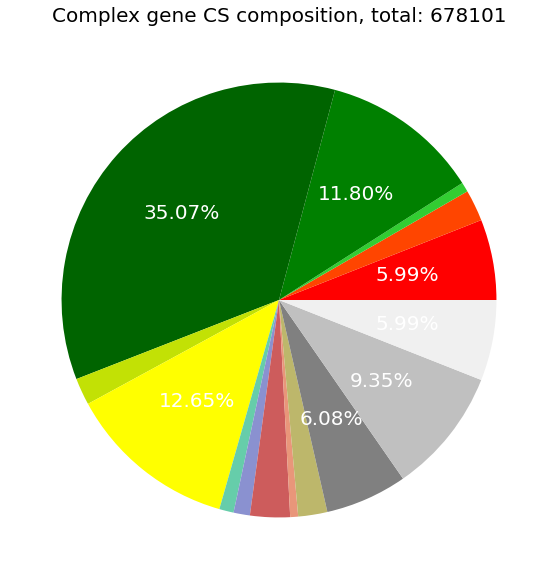

In [117]:
css_composition_piechart(splitted, complexity=True, show_pct=5)

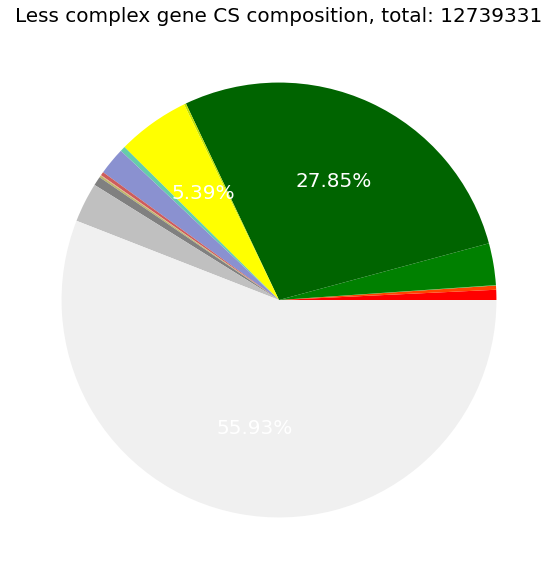

In [118]:
css_composition_piechart(less_splitted, complexity=False, show_pct=5)

In [22]:
# save_as_txt(comp_gene_css_all)

In [23]:
# save_as_txt(less_comp_gene_css_all,filename="less_complex_gene_all")

In [97]:
less_splitted, less_kemerized_unit_css=css_CUT_Kmer(less_comp_gene_css_all, 510, 5)

In [98]:
less_splitted[:3]

['OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB',
 'AOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGEEGGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGGB']

In [25]:
splitted, kmerized_unit_css=css_CUT_Kmer(comp_gene_css_all, 510, 5)

In [50]:
test_splitted=splitted[:5]
test_splitted

['MMMMMMMMMMMMMNNNNNNNNNNNNLMMMMMMMMMML',
 'MNNEEEEEEEEEEEEEEEEEEEEEEEEEDDDDDDDEEEEEEEEEEEEEEEEEEEEDDDDDDDDEEEEGGGEAAJJ',
 'JJJJJJMMMNNNNNNNNNNNNN',
 'MMMJJJMNNNNNNNNMMMNNNNNNNNNNN',
 'MMMJJJMNNNNNNNNMMMNNNNNNNNNNN']

In [175]:
all_state=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
count_state = {state: [] for state in all_state} 

In [69]:
import matplotlib.pyplot as plt

data = {'A': 40616, 'B': 15857, 'C': 4861, 'D': 80045, 'E': 237835, 'F': 13581, 'G': 85784, 'H': 7249, 'I': 8230, 'J': 20085, 'K': 3990, 'L': 14676, 'M': 41262, 'N': 63394, 'O': 40636}

In [74]:
# Calculate total
total = sum(data.values())
sizes = [i/sum(data.values())*100 for i in data.values()]

In [81]:
labels=list(data.keys())
labels

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

In [82]:

# only label wedges greater than 5%
final_labels = []
for i, size in enumerate(sizes):
    if size >= 5:
        final_labels.append(labels[i])
    else:
        final_labels.append('')
final_labels

['A', '', '', 'D', 'E', '', 'G', '', '', '', '', '', 'M', 'N', 'O']

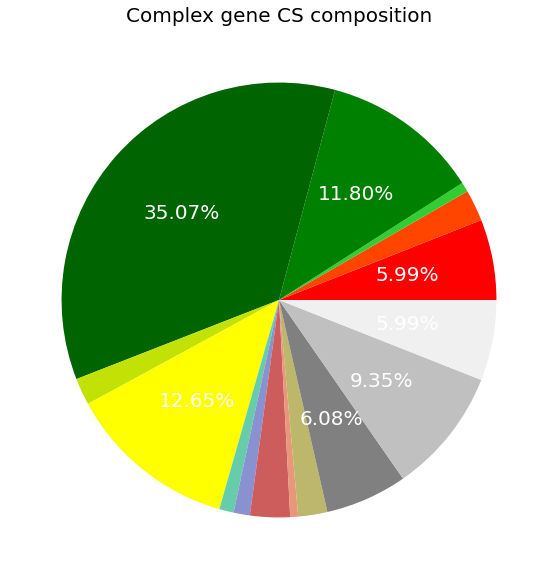

In [93]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(data.values(),colors=[state_col_dict[label] for label in data.keys()], autopct=lambda p: '{:.2f}%'.format(p) if p > 5 else '')

for t in ax.texts:
    t.set_color("white")
    t.set_fontsize(20)

ax.set_title("Complex gene CS composition",fontsize=20)
# Show the plot
plt.show()


In [58]:
state_col_dict

{'A': (1.0, 0.0, 0.0),
 'B': (1.0, 0.27058823529411763, 0.0),
 'C': (0.19607843137254902, 0.803921568627451, 0.19607843137254902),
 'D': (0.0, 0.5019607843137255, 0.0),
 'E': (0.0, 0.39215686274509803, 0.0),
 'F': (0.7607843137254902, 0.8823529411764706, 0.0196078431372549),
 'G': (1.0, 1.0, 0.0),
 'H': (0.4, 0.803921568627451, 0.6666666666666666),
 'I': (0.5411764705882353, 0.5686274509803921, 0.8156862745098039),
 'J': (0.803921568627451, 0.3607843137254902, 0.3607843137254902),
 'K': (0.9137254901960784, 0.5882352941176471, 0.47843137254901963),
 'L': (0.7411764705882353, 0.7176470588235294, 0.4196078431372549),
 'M': (0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 'N': (0.7529411764705882, 0.7529411764705882, 0.7529411764705882),
 'O': (0.9411764705882353, 0.9411764705882353, 0.9411764705882353)}

In [ ]:
    # for statistics, do it later
# #     a,b,c,d,e,f,g,h,i,j,k,l,m,n,o=0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
#     all_state=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o']
#     count_state={state:[] for state in all_state}
#     for elm in splitted:
#         for state in all_state:
#             count_state[state].append(elm.count(state))

In [56]:
# with open("../database/temp_files/complexity/thres_mean/comp", "wb") as f:
#     pickle.dump(comp_gene_css_all,f)

In [57]:
# with open("../database/temp_files/complexity/thres_mean/less_comp", "wb") as g:
#     pickle.dump(less_comp_gene_css_all,g)

In [16]:
df_tot=complexity_overview_mat(tot_gene_css)

In [17]:
len(df_tot)

43217

In [18]:
thres_tot=np.mean(df_tot["switch_pro"])
thres_tot

0.10302798793969078

In [19]:
df_tot_comp=df_tot[df_tot["switch_pro"]>thres_tot]
df_tot_less=df_tot[df_tot["switch_pro"]<=thres_tot]

In [21]:
len(df_tot_comp)

13484

In [22]:
len(df_tot_less)

29733

In [23]:
df_tot_less.head()

,length,uniq,switch,uniq_pro,switch_pro
0,67,1,1,0.014925,0.014925
2,157,5,8,0.031847,0.050955
3,157,5,8,0.031847,0.050955
4,157,5,8,0.031847,0.050955
5,157,5,8,0.031847,0.050955


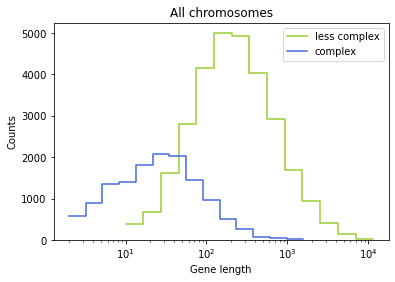

In [20]:
fig,ax=plt.subplots(figsize=(6,4))
sns.histplot(df_tot_less["length"], ax=ax, log_scale=True, color="yellowgreen", element="step", fill=False, bins=14, legend="less complex" )
sns.histplot(df_tot_comp["length"], ax=ax, log_scale=True, color="royalblue", element="step", fill=False, bins=14, legend="complex" )
ax.set_ylabel("Counts")
ax.set_xlabel("Gene length")
ax.set_title("All chromosomes")
ax.legend(["less complex","complex"])
plt.show()

In [121]:
len(df_tot_comp[df_tot_comp["length"]>=5])/len(df_tot_comp)

0.9245712551221733

#### Then let's define the genes (in terms of CSS) longer than 5 units as `df_tot_comp_ov5`

In [123]:
df_tot_comp_ov5=df_tot_comp[df_tot_comp["length"]>=5]
len(df_tot_comp_ov5)

12184

#### For comparison, counterpart in less complex region is defined as `df_tot_less_ov5`

In [125]:
len(df_tot_less[df_tot_less["length"]>=5])/len(df_tot_less)

1.0

In [124]:
df_tot_less_ov5=df_tot_less[df_tot_less["length"]>=5]
len(df_tot_less_ov5)

30039

In [133]:
df_tot

,length,uniq,switch,uniq_pro,switch_pro
0,67,1,1,0.014925,0.014925
2,157,5,8,0.031847,0.050955
3,157,5,8,0.031847,0.050955
4,157,5,8,0.031847,0.050955
5,157,5,8,0.031847,0.050955
...,...,...,...,...,...
43423,10,3,3,0.300000,0.300000
43424,10,3,3,0.300000,0.300000
43425,10,3,3,0.300000,0.300000
43426,8,2,2,0.250000,0.250000


In [137]:
df_tot["length"].corr(df_tot["switch"])  # plausible. the longer the more switch

0.8301745917896857

In [136]:
df_tot["length"].corr(df_tot["switch_pro"]) # plausible, the longer, the less percentage of change

-0.278289923560778

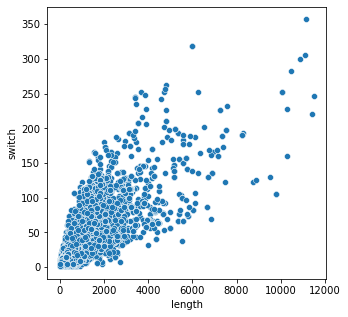

In [147]:
# corr=df_tot["length"].corr(df_tot["switch"]) 
fig=plt.figure(figsize=(5,5))
sns.scatterplot(x="length",y="switch", data=df_tot)
ax = plt.gca()
# ax.text(0.5, 0.5, "Correlation: {:.2f}".format(corr), 
#         ha="left", va="baseline", transform=ax.transAxes)

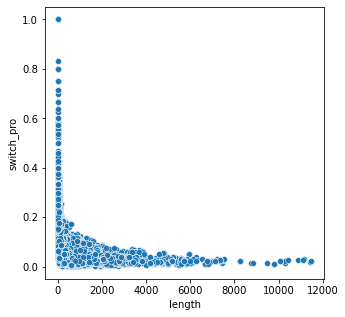

In [148]:
fig=plt.figure(figsize=(5,5))
sns.scatterplot(x="length",y="switch_pro", data=df_tot)
ax = plt.gca()

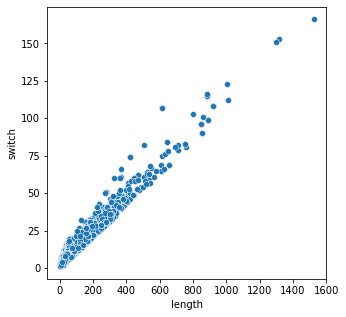

In [154]:
fig=plt.figure(figsize=(5,5))
sns.scatterplot(x="length",y="switch", data=df_tot_comp)
ax = plt.gca()

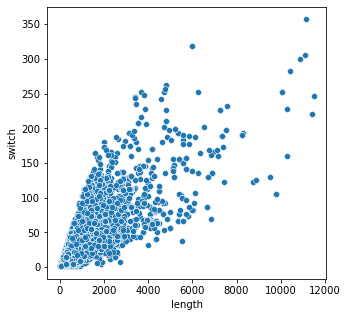

In [155]:
fig=plt.figure(figsize=(5,5))
sns.scatterplot(x="length",y="switch", data=df_tot_less)
ax = plt.gca()

In [159]:
with open("../database/temp_files/complexity/thres_mean/comp", "wb") as f:
    pickle.dump(comp,f)

NameError: name 'comp' is not defined

<AxesSubplot:xlabel='switch_pro', ylabel='Count'>

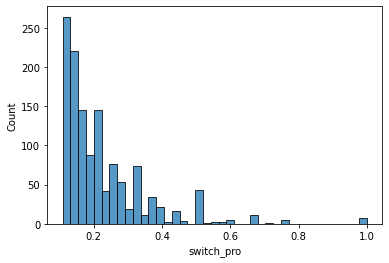

In [33]:
sns.histplot(df_comp["switch_pro"])

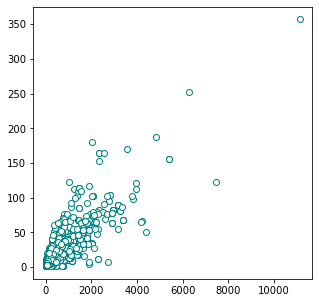

In [35]:
figure=plt.figure(figsize=(5,5))
plt.scatter(df[["length"]],df[["switch"]], c="white",edgecolors="teal")

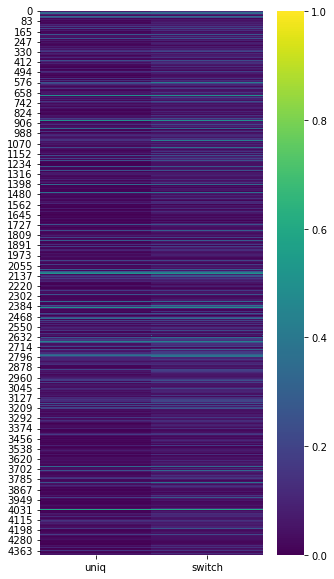

In [106]:
figure=plt.figure(figsize=(5,10))
sns.heatmap(df[["uniq","switch"]],cmap='viridis', vmin=0, vmax=1)
plt.show()